# Dog Breed Prediction
In this project I used keras and tensorflow to build, train and test a convolutional neural network capable of identifying the breed of a dog in a given image.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ifeanyinneji","key":"8b2bf57c9f908889794304ca6d672b54"}'}

In [3]:
! pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [6]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           1322          5  0.1764706        


In [7]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp 
%cd ..

 99% 683M/691M [00:05<00:00, 160MB/s]
100% 691M/691M [00:05<00:00, 125MB/s]
/content


In [8]:
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D



In [10]:
from tensorflow.keras.optimizers import Adam 

In [11]:
labels_all = pd.read_csv('dog_dataset/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
breed_all = labels_all['breed']
breed_all.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [13]:
class_names = ['scottish_deerhound' ,'maltese_dog' ,'afghan_hound ','entlebucher ','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(class_names))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [14]:
X_data = np.zeros((len(labels), 224,224,3), dtype='float32')

# One hot encoding
Y_data = label_binarize(labels['breed'], classes=class_names)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i], target_size = (224,224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x/255.0

# Printing the train image and one hot encode shape and size
print('\nTrain Images Shape: ', X_data.shape,'size: {:,}'.format(X_data.size))
print('\nOne-hot encoded output Shape: ', Y_data.shape,'size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:01<00:00, 295.91it/s]


Train Images Shape:  (357, 224, 224, 3) size: 53,738,496

One-hot encoded output Shape:  (357, 5) size: 1,785


In [15]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(class_names), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [16]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [21]:
# Training the model
epochs = 130
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/130
2/2 [==============================] - 1s 451ms/step - loss: 2.0048 - accuracy: 1.0000 - val_loss: 2.7418 - val_accuracy: 0.7385
Epoch 2/130
2/2 [==============================] - 1s 386ms/step - loss: 1.9997 - accuracy: 1.0000 - val_loss: 2.7455 - val_accuracy: 0.7385
Epoch 3/130
2/2 [==============================] - 1s 387ms/step - loss: 1.9948 - accuracy: 1.0000 - val_loss: 2.7490 - val_accuracy: 0.7385
Epoch 4/130
2/2 [==============================] - 1s 416ms/step - loss: 1.9897 - accuracy: 1.0000 - val_loss: 2.7406 - val_accuracy: 0.7385
Epoch 5/130
2/2 [==============================] - 1s 475ms/step - loss: 1.9846 - accuracy: 1.0000 - val_loss: 2.7287 - val_accuracy: 0.7385
Epoch 6/130
2/2 [==============================] - 1s 428ms/step - loss: 1.9799 - accuracy: 1.0000 - val_loss: 2.7287 - val_accuracy: 0.7385
Epoch 7/130
2/2 [==============================] - 1s 439ms/step - loss: 1.9749 - accuracy: 1.0000 - val_loss: 2.7305 - val_accuracy: 0.7385
Epoch 8/130
2

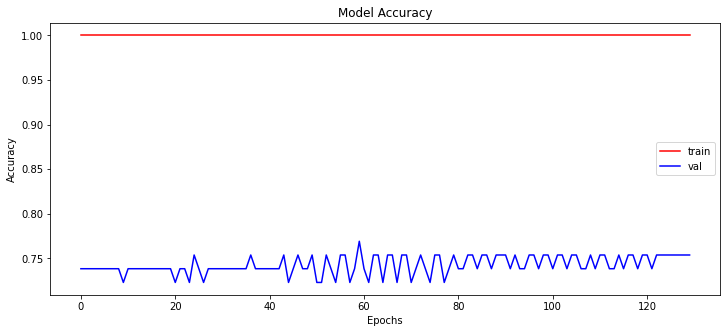

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [23]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 11ms/step - loss: 3.4429 - accuracy: 0.7500
Accuracy over the test set: 
  75.0 %


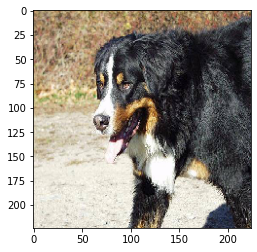

Originally :  bernese_mountain_dog
Predicted :  bernese_mountain_dog


In [26]:
plt.imshow(X_test[2,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[2])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[2])])

In [47]:
from keras.models import save_model

# you can write whatever you desire instead of 'my_model'
# model = Your trained model
model.save('dog_model.h5')

In [29]:
!pip install -q streamlit

     |████████████████████████████████| 10.1 MB 13.9 MB/s 
     |████████████████████████████████| 111 kB 80.7 MB/s 
     |████████████████████████████████| 164 kB 71.7 MB/s 
     |████████████████████████████████| 4.3 MB 70.6 MB/s 
     |████████████████████████████████| 181 kB 84.6 MB/s 
     |████████████████████████████████| 77 kB 4.3 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 131 kB 84.5 MB/s 
     |████████████████████████████████| 130 kB 77.3 MB/s 
     |████████████████████████████████| 428 kB 39.2 MB/s 
     |████████████████████████████████| 793 kB 64.6 MB/s 
     |████████████████████████████████| 381 kB 59.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 

In [26]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 13.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=9f3cbc86df173968301c2e89b668117c9ab74745214035900df6075abb74f4b8
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [43]:
!./ngrok authtokens 29vr8YhWZ9CDHrUq2kr0CpUA0e8_6ik4hU5GjJZeAYagTH5i4

/bin/bash: ./ngrok: No such file or directory


In [38]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8502')
public_url

<NgrokTunnel: "http://19ea-34-141-213-173.ngrok.io" -> "http://localhost:80">

In [31]:
!wget https://github.com/Nneji123/Penguin-Species-Prediction-App/blob/main/penguin_predictor_app.py

--2022-05-31 13:42:03--  https://github.com/Nneji123/Penguin-Species-Prediction-App/blob/main/penguin_predictor_app.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘penguin_predictor_app.py’

penguin_predictor_a     [ <=>                ] 174.15K  --.-KB/s    in 0.02s   

2022-05-31 13:42:03 (7.07 MB/s) - ‘penguin_predictor_app.py’ saved [178330]



In [55]:
%%writefile streamlit_app.py
#Library imports
import numpy as np
import streamlit as st
import cv2
from keras.models import load_model
import joblib

#Loading the Model
model = joblib.load('dog_breed_predictor.pkl')

st.image('dog_image.webp')
st.markdown("## Dog Breed Prediction App")
st.markdown("""
This app uses deep learning (Convolutional Neural Network) libraries namely keras to predict the following breeds of dogs given the input image:
1. Scottish Deerhound
2. Maltese Dog
3. Afghan Hound
4. Entlebucher
5. Bernese Mountain Dog

**Made by Ifeanyi Nneji**
Data source: kaggle/catherinehorng/dogbreedidfromcomp
""")

#Name of Classes
CLASS_NAMES = ['Scottish Deerhound' ,'Maltese Dog' ,'Afghan Hound ','Entlebucher ','Bernese Mountain Dog']

st.markdown("Upload an image of the dog")

#Uploading the dog image
dog_image = st.file_uploader("Upload an image...", type=['png','jpg','webp'])
submit = st.button('Predict')
#On predict button click
if submit:

    if dog_image is not None:

        # Convert the file to an opencv image.
        file_bytes = np.asarray(bytearray(dog_image.read()), dtype=np.uint8)
        opencv_image = cv2.imdecode(file_bytes, 1)



        # Displaying the image
        st.image(opencv_image, channels="BGR")
        #Resizing the image
        opencv_image = cv2.resize(opencv_image, (224,224))
        #Convert image to 4 Dimension
        opencv_image.shape = (1,224,224,3)
        #Make Prediction
        Y_pred = model.predict(opencv_image)

        st.text(str("The Dog Breed is "+CLASS_NAMES[np.argmax(Y_pred)]))


Overwriting streamlit_app.py


In [54]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

2022-05-31 14:35:01.179 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.881s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.141.213.173:8501

your url is: https://whole-bushes-tell-34-141-213-173.loca.lt
  Stopping...
^C


In [56]:
!pip freeze > requirements.txt